In [ ]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the data
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df.shape

(1017209, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# check for the missing values
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# isolet the Date and Sales columns
df = df[['Date', 'Sales']]

In [ ]:
# change the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1017209 non-null  datetime64[ns]
 1   Sales   1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.5 MB


## Cheking for Stationarity

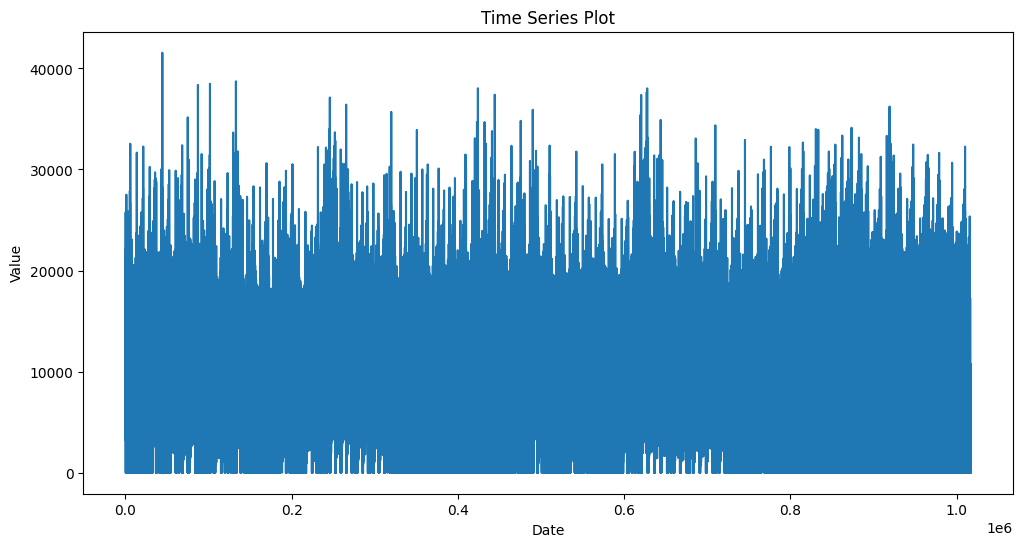

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()

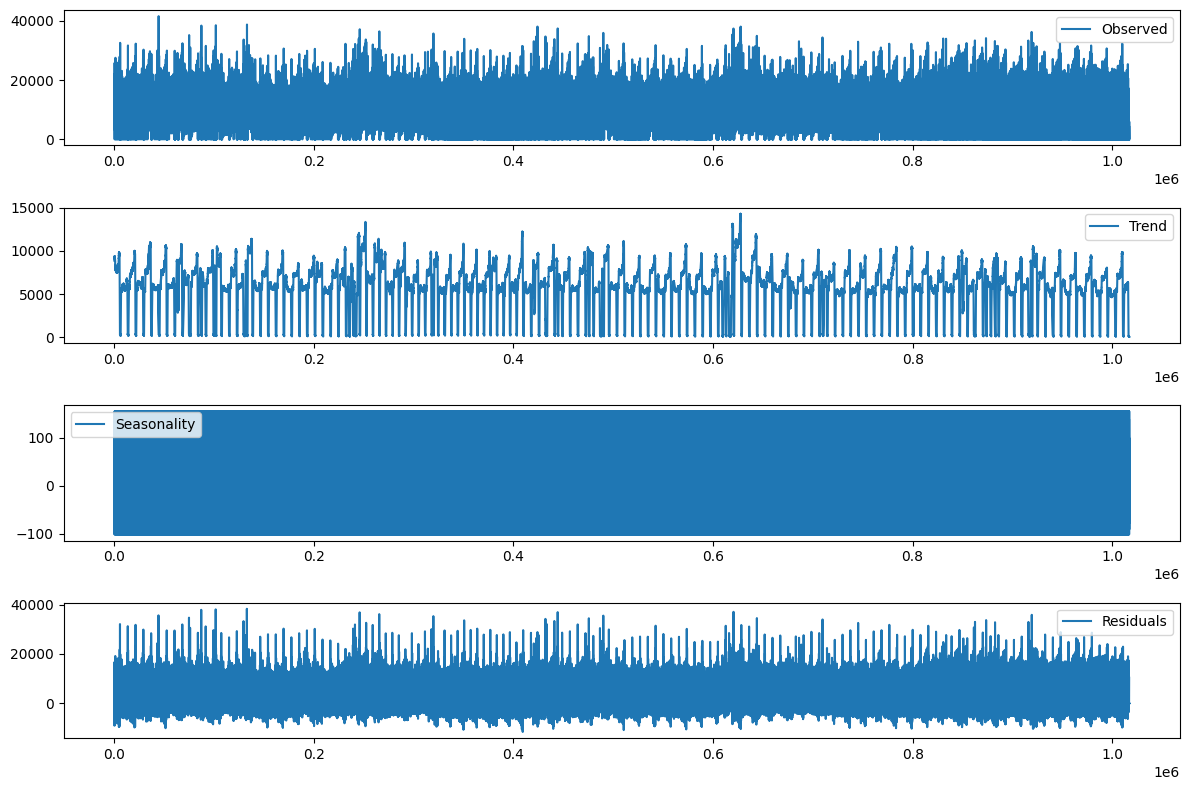

In [ ]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(df['Sales'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Checking for ACF and PACF

<Figure size 1000x500 with 0 Axes>

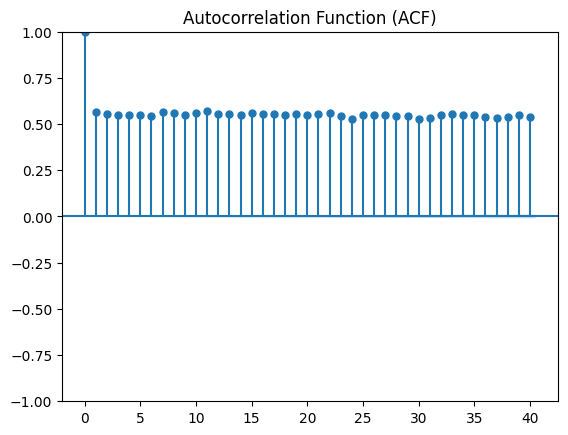

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(df['Sales'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

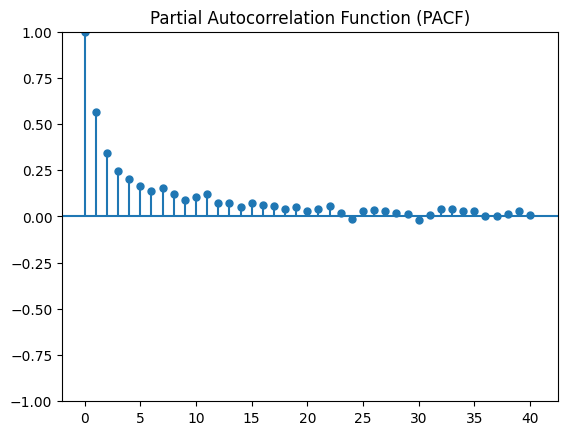

In [ ]:
plt.figure(figsize=(10, 5))
plot_pacf(df['Sales'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Data preprocessing

In [ ]:
df

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


# Transforming to time series data

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
# Split into training and testing sets based on index
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
train_data

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822
...,...
2013-07-02,6028
2013-07-02,10110
2013-07-02,7793


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2013-07-02 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
test_data

,Sales
Date,
2013-07-02,7443
2013-07-02,8650
2013-07-02,6454
2013-07-02,7043
2013-07-02,5508
...,...
2013-01-01,0
2013-01-01,0
2013-01-01,0


In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2013-07-02 00:00:00'))

# Scalling the data

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Sales']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Sales']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
25428/25428 ━━━━━━━━━━━━━━━━━━━━ 1135s 45ms/step - loss: 0.0040
Epoch 2/5
25428/25428 ━━━━━━━━━━━━━━━━━━━━ 1087s 43ms/step - loss: 0.0038
Epoch 3/5
25428/25428 ━━━━━━━━━━━━━━━━━━━━ 1069s 41ms/step - loss: 0.0037
Epoch 4/5
25428/25428 ━━━━━━━━━━━━━━━━━━━━ 1106s 42ms/step - loss: 0.0036
Epoch 5/5
25428/25428 ━━━━━━━━━━━━━━━━━━━━ 1089s 41ms/step - loss: 0.0036
6355/6355 ━━━━━━━━━━━━━━━━━━━━ 88s 14ms/step
5636.360037565231


## Checking the prediction

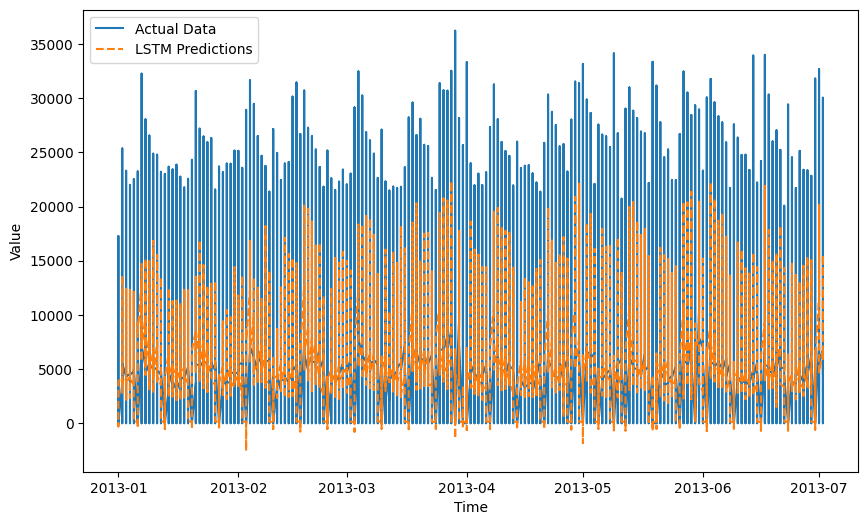

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

30.26907101002767


In [ ]:
# Set the date as the index
df.set_index('Date', inplace=True)

In [ ]:
# perform ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

# Check for stationarity
adf_test(df['Sales'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))